In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
data=pd.read_excel('D:/Downloads\Analytics Associate Interview test.xlsx',sheet_name='data')

In [4]:
data.head()

,Date,Agent name,Response,uid,Converted?,average payment delay before weekly (days),revenue per day before weekly,revenue per day after weekly
0,2023-08-06,Rose Kanyiri,No-financial constraints,126022,No,2,43,43
1,2023-07-06,Allan Mutuota,No- low priority,101372,No,1,33,33
2,2023-07-05,Greyson Ochanda,No- low priority,104620,No,5,28,28
3,2023-08-31,Allan Mutuota,No- service dissatisfaction,28997,No,3,41,41
4,2023-09-13,Rose Kanyiri,No- low priority,76405,No,4,29,29


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        1961 non-null   datetime64[ns]
 1   Agent name                                  1961 non-null   object        
 2   Response                                    1961 non-null   object        
 3   uid                                         1961 non-null   int64         
 4   Converted?                                  1961 non-null   object        
 5   average payment delay before weekly (days)  1961 non-null   int64         
 6   revenue per day before weekly               1961 non-null   int64         
 7   revenue per day after weekly                1961 non-null   int64         
 8   DayOfWeek                                   1961 non-null   object        
 9   total_re

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,1961.0,84629.064763,32232.518042,336.0,60022.0,89575.0,110842.0,134765.0
average payment delay before weekly (days),1961.0,3.949516,2.006622,1.0,2.0,4.0,6.0,7.0
revenue per day before weekly,1961.0,35.932177,8.258020,22.0,29.0,36.0,43.0,50.0
revenue per day after weekly,1961.0,36.681285,8.621219,22.0,29.0,37.0,44.0,57.0


In [31]:
data.isnull().sum()

Date                                          0
Agent name                                    0
Response                                      0
uid                                           0
Converted?                                    0
average payment delay before weekly (days)    0
revenue per day before weekly                 0
revenue per day after weekly                  0
DayOfWeek                                     0
total_revenue_before_weekly                   0
total_revenue_after_weekly                    0
total_revenue                                 0
dtype: int64

Customer Retention Percentage:
 No     94.084651
Yes     5.915349
Name: Converted?, dtype: float64


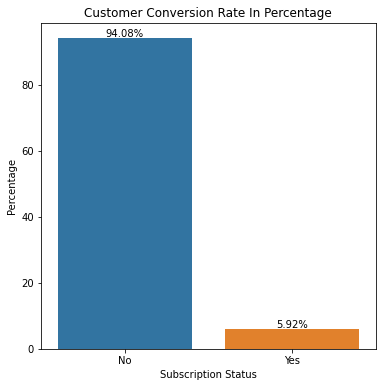

Reachability by Day of the Week:
 Response   No- low priority  No- service dissatisfaction  \
DayOfWeek                                                  
Friday             0.347134                     0.028662   
Monday             0.302682                     0.038314   
Saturday           0.311864                     0.040678   
Sunday             0.291367                     0.043165   
Thursday           0.332192                     0.044521   
Tuesday            0.333333                     0.020325   
Wednesday          0.294545                     0.054545   

Response   No-financial constraints  Not reachable  Yes- affordable  
DayOfWeek                                                            
Friday                     0.171975       0.073248         0.378981  
Monday                     0.187739       0.076628         0.394636  
Saturday                   0.122034       0.047458         0.477966  
Sunday                     0.133094       0.082734         0.449640  
Thurs

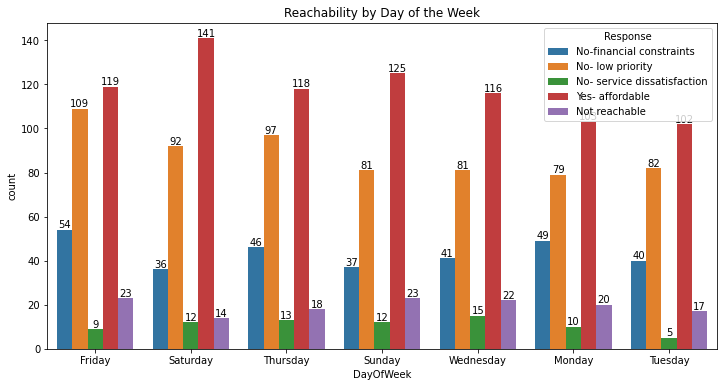

Agent Performance:
 Converted?             No       Yes
Agent name                         
Allan Mutuota    0.955446  0.044554
Greyson Ochanda  0.950413  0.049587
Lutta Mboya      0.877333  0.122667
Rose Kanyiri     0.961694  0.038306


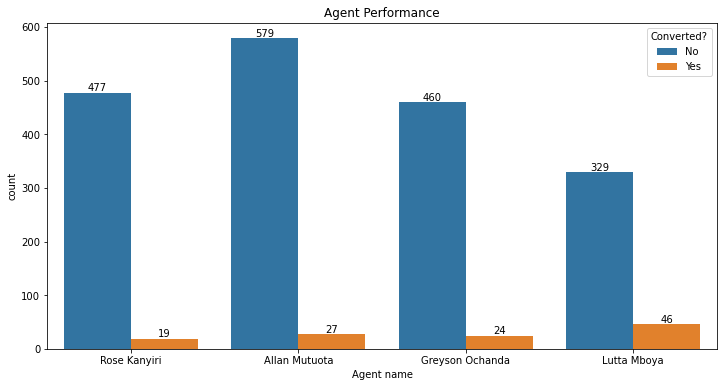

In [23]:
# Customer conversion rate Analysis
# Customer conversion rate Percentage
retention_percentage = data['Converted?'].value_counts(normalize=True) * 100
print("Customer Retention Percentage:\n", retention_percentage)

# Visualization for Customer Retention Percentage
plt.figure(figsize=(6, 6))
ax1 = sns.barplot(x=retention_percentage.index, y=retention_percentage.values)
plt.title('Customer Conversion Rate In Percentage')
plt.xlabel('Subscription Status')
plt.ylabel('Percentage')

# Annotate each bar with its respective percentage value
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}%', 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Reachability Analysis by Day of Week
data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.day_name()
reachability_by_day = data.groupby('DayOfWeek')['Response'].value_counts(normalize=True).unstack()
print("Reachability by Day of the Week:\n", reachability_by_day)

plt.figure(figsize=(12, 6))
ax2 = sns.countplot(x='DayOfWeek', hue='Response', data=data, order=data['DayOfWeek'].value_counts().index)
plt.title('Reachability by Day of the Week')

# Annotate each bar with its respective count value
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

# Individual Agent Performance Analysis
agent_performance = data.groupby('Agent name')['Converted?'].value_counts(normalize=True).unstack()
print("Agent Performance:\n", agent_performance)

plt.figure(figsize=(12, 6))
ax3 = sns.countplot(x='Agent name', hue='Converted?', data=data)
plt.title('Agent Performance')

# Annotate each bar with its respective count value
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Non-Renewal Reasons:
 Yes- affordable                708
No- low priority               621
No-financial constraints       303
Not reachable                  137
No- service dissatisfaction     76
Name: Response, dtype: int64


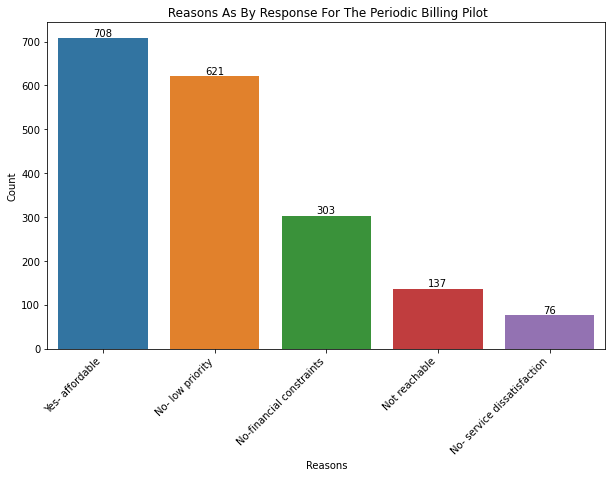

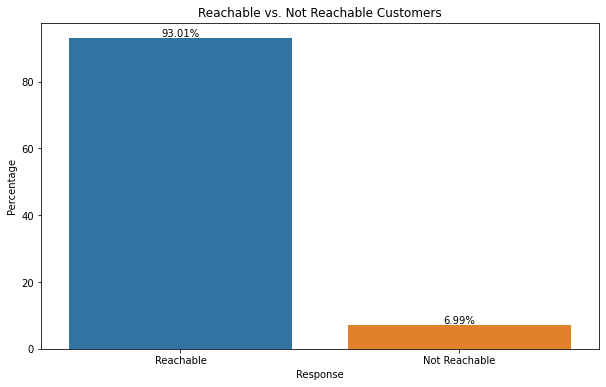

In [25]:

#Other Metrics
# Non-Renewal Reasons
non_renewal_reasons = data[data['Converted?'] == 'No']['Response'].value_counts()
print("Non-Renewal Reasons:\n", non_renewal_reasons)

# Visualization for Non-Renewal Reasons
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=non_renewal_reasons.index, y=non_renewal_reasons.values)

# Add figures on top of the bars
for index, value in enumerate(non_renewal_reasons.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.title(' Reasons As By Response For The Periodic Billing Pilot')
plt.xlabel('Reasons')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()
# Count the number of 'Not reachable' and 'Reachable' responses
not_reachable_count = data[data['Response'] == 'Not reachable'].shape[0]
reachable_count = total_customers_contacted - not_reachable_count

# Calculate the Not Reachable and Reachable Rates
not_reachable_rate = (not_reachable_count / total_customers_contacted) * 100
reachable_rate = 100 - not_reachable_rate

# Create a DataFrame for plotting
reachability_data = pd.DataFrame({'Response': ['Reachable', 'Not Reachable'],
                                   'Count': [reachable_count, not_reachable_count],
                                   'Percentage': [reachable_rate, not_reachable_rate]})

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Response', y='Percentage', data=reachability_data)
plt.title('Reachable vs. Not Reachable Customers')
plt.ylabel('Percentage')

# Add exact percentage labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()